# Клепиков Никита
Вариант 7

Группа 6132

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer, recall_score, f1_score
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

In [2]:
def generate_data(M=775,shift = 2):
    np.random.seed(0)
    noise = np.random.randn(M, 2) 
    
    cloud_1 = noise + np.array([shift, shift * 2])
    cloud_2 = noise + np.array([shift, -shift])
    cloud_3 = noise + np.array([-shift, shift*2])
    cloud_4 = noise + np.array([-shift, -shift])
    cloud_5 = noise + np.array([shift*2, shift*1.25])
    cloud_6 = noise + np.array([shift*2, 0])
    cloud_7 = noise + np.array([-shift*2, shift*0.5])

    XY = np.vstack([cloud_1, cloud_2, cloud_3, cloud_4, cloud_5, cloud_6, cloud_7])

    annotation_1 = [0]*M
    annotation_2 = [1]*M
    annotation_3 = [2]*M
    annotation_4 = [3]*M
    annotation_5 = [4]*M
    annotation_6 = [5]*M
    annotation_7 = [6]*M
    
    annotations = annotation_1 + annotation_2 + annotation_3 + annotation_4 + annotation_5 + annotation_6 + annotation_7
    
    plt.scatter(XY[:,0], XY[:,1], c=annotations)
    data, labels = shuffle(XY, annotations)
    data = pd.DataFrame(data)
    return train_test_split(data, labels, test_size=0.5)

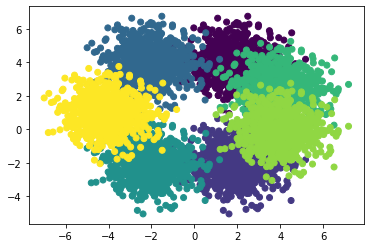

In [3]:
X_train, X_test, y_train, y_test = generate_data()

## Grid Search with CV: 

In [4]:
def fn(y_true, y_pred): 
    conf_mat = confusion_matrix(y_true, y_pred)
    f_n = conf_mat.sum(axis=1) - np.diag(conf_mat)
    return f_n.sum() / conf_mat.sum()

In [5]:
clf_dt = DecisionTreeClassifier(random_state=42)
dt_parameters={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15], 
               'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
               'criterion': ['gini', 'entropy']
              }
   
grid_search_cv_clf_dt = GridSearchCV(
        clf_dt, 
        dt_parameters, 
        cv=8, 
        scoring=make_scorer(fn, greater_is_better=False), 
        n_jobs=-1,
)
grid_search_cv_clf_dt.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring=make_scorer(fn, greater_is_better=False))

In [6]:
grid_search_cv_clf_dt.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 9}

In [7]:
best_clf_dt = grid_search_cv_clf_dt.best_estimator_
pred_dt_gs = best_clf_dt.predict(X_test)
print("Classification Report: \n",classification_report(y_test, pred_dt_gs))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       372
           1       0.90      0.88      0.89       393
           2       0.93      0.96      0.95       402
           3       0.95      0.94      0.94       374
           4       0.78      0.82      0.80       391
           5       0.82      0.80      0.81       413
           6       0.94      0.91      0.93       368

    accuracy                           0.88      2713
   macro avg       0.88      0.88      0.88      2713
weighted avg       0.88      0.88      0.88      2713



In [8]:
clf_kn = KNeighborsClassifier()
kn_parameters = {
        'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
        'weights' : ['uniform', 'distance']
    }
grid_search_cv_clf_kn = GridSearchCV(
        clf_kn,
        kn_parameters,
        cv=8,
        scoring=make_scorer(fn, greater_is_better=False),
        n_jobs=-1
    )
grid_search_cv_clf_kn.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(fn, greater_is_better=False))

In [9]:
grid_search_cv_clf_kn.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [10]:
best_clf_kn = grid_search_cv_clf_kn.best_estimator_
pred_kn_gs = best_clf_kn.predict(X_test)
print("Classification Report: \n", 
      classification_report(y_test, pred_kn_gs))

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       372
           1       0.89      0.90      0.89       393
           2       0.94      0.95      0.95       402
           3       0.93      0.96      0.95       374
           4       0.79      0.79      0.79       391
           5       0.83      0.78      0.81       413
           6       0.94      0.93      0.94       368

    accuracy                           0.88      2713
   macro avg       0.88      0.88      0.88      2713
weighted avg       0.88      0.88      0.88      2713



## Randomized Search CV:

In [11]:
random_search_cv_dt = RandomizedSearchCV(
        clf_dt,
        dt_parameters,
        n_iter=10,
        scoring=make_scorer(fn, greater_is_better=False),
        cv=8,
        n_jobs=-1
)
random_search_cv_dt.fit(X_train, y_train)

RandomizedSearchCV(cv=8, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]},
                   scoring=make_scorer(fn, greater_is_better=False))

In [12]:
random_search_cv_dt.best_params_

{'min_samples_split': 8, 'max_depth': 5, 'criterion': 'gini'}

In [13]:
best_clf_dt_rs = random_search_cv_dt.best_estimator_
pred_dt_rs = best_clf_dt_rs.predict(X_test)
print("Classification Report:\n", classification_report(y_test, pred_dt_rs))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       372
           1       0.88      0.88      0.88       393
           2       0.94      0.94      0.94       402
           3       0.95      0.92      0.94       374
           4       0.80      0.81      0.80       391
           5       0.82      0.79      0.81       413
           6       0.89      0.93      0.91       368

    accuracy                           0.88      2713
   macro avg       0.88      0.88      0.88      2713
weighted avg       0.88      0.88      0.88      2713



In [14]:
random_search_cv_kn = RandomizedSearchCV(
        clf_kn,
        kn_parameters,
        n_iter=10,
        scoring=make_scorer(fn, greater_is_better=False),
        cv=8, 
        n_jobs=-1
)
random_search_cv_kn.fit(X_train, y_train)

RandomizedSearchCV(cv=8, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 15, 20],
                                        'weights': ['uniform', 'distance']},
                   scoring=make_scorer(fn, greater_is_better=False))

In [15]:
random_search_cv_kn.best_params_

{'weights': 'uniform', 'n_neighbors': 10}

In [16]:
best_clf_kn_rs = random_search_cv_kn.best_estimator_
pred_kn_rs = best_clf_kn_rs.predict(X_test)
print("Classification Report :\n", classification_report(y_test, pred_kn_rs))

Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       372
           1       0.89      0.90      0.89       393
           2       0.94      0.95      0.95       402
           3       0.93      0.96      0.95       374
           4       0.79      0.79      0.79       391
           5       0.83      0.78      0.81       413
           6       0.94      0.93      0.94       368

    accuracy                           0.88      2713
   macro avg       0.88      0.88      0.88      2713
weighted avg       0.88      0.88      0.88      2713



# Вывод:

При сравнении двух методов мы выяснили, что при различных способах поиска наилучших параметров: дерево решений показывает наиболее высокую F-меру по сравнению с методом к-наиближайших соседей, при этом значения одинаковые, что для сеточного расчета, что для рандомного. Данная оценка классификатора является наиболее эффективной.  

Стоит отдельно рассмотреть процесс выполнения подбора параметров: если при Grid Search мы рассматриваем всеразличные комбинации из параметров, что замедляет процесс подбора, но при этом делает его более точным и однозначно находит среди параметров наилучшие, то при Random Search, мы ограничены количеством возможных итераций. Таким образом, попадаем в ситуацию: либо за отведенное количество итераций возможно получим такие же параметры как и в Grid'e, но гораздо быстрее, либо же мы получим результат хуже.

Подбор при Grid'e показал, что наилучшим является модель решающего дерева с глубиной дерева равной двум.

Таким образом, при сеточном подборе мы удостовериваемся, что получили действительно наилучшее результаты из заданных параметров.
